# Inspect dME-model properties

Code for reproducing panels of Figure 3

## Setup environment

In [1]:
import coralme
from coralme.builder.helper_functions import *
import pickle
import pandas
import os
import tqdm
import json
import matplotlib.pyplot as plt
import numpy as np
import sympy
pandas.set_option('display.max_colwidth', None)
plt.rcParams['svg.fonttype'] = 'none'

## Functions to load and inspect models

Load a ME-model

In [2]:
def load_me(filename='me_model.pickle'):
    with open(filename, "rb") as f:
        return pickle.load(f)

Get contigs from GenBank file

In [3]:
def get_genbank_contigs(path):
    import Bio
    gb_it = Bio.SeqIO.parse(path, "gb")
    return [ i for i in gb_it ]

Get property breakdown from a model

In [4]:
def get_info(model, info_flag='all'):
    if info_flag == 'all':
        return {
            'genes':len([i for i in model.genes if 'dummy' not in i.id]),
            'reactions':len(model.reactions),
            'metabolites':len(model.metabolites),
        }
    else:
        return get_breakdown(model,info_flag)

def get_breakdown(model,field):
    count = {}
    for instance in getattr(model,field):
        instance_type = instance.__class__.__name__
        if instance_type not in count.keys():
            count[instance_type] = 0
        count[instance_type] += 1
    return {'genes':count}

Get organism directories in path

In [5]:
def get_org_dirs(directory):
    return [i for i in os.listdir(directory) \
            if os.path.isdir(directory+i) and '.' not in i and '_' not in i]

Load models in a directory

In [6]:
def load_models_from_directory(directory,solve=False):
    d = {}
    dirs = get_org_dirs(directory)
    for i in tqdm.tqdm(dirs):
        modelpath = directory + '{}/MEModel-step2-{}.pkl'.format(i,i)
        d[i] = load_me(modelpath)
        if solve:
            d[i].optimize()
    return d

Main function to get and summarize ME-model properties

In [7]:
def get_specs(models, info_flag = 'all'):
    info = {}
    for k,v in models.items():
        for i,m in v.items():
            m.genes = [g for g in m.metabolites if isinstance(g,coralme.core.component.TranscribedGene)]
            name = i
            if name not in info:
                info[name] = {}
            info[name]['mmodel'] = get_info(m.gem, info_flag=info_flag)['genes']
            if 'clean' in k:
                info[name]['coralme'] = get_info(m, info_flag=info_flag)['genes']
            else:
                info[name]['curated'] = get_info(m, info_flag=info_flag)['genes']
            if info_flag == 'all':
                if name in published_info:
                    info[name]['published'] = published_info[name]['genes']
                info[name]['genome'] = features[name]
    if info_flag == 'all':
        return pandas.DataFrame.from_dict(info).fillna(0).T[['mmodel','coralme','curated','published','genome']].sort_values('published',ascending=True)
    return pandas.DataFrame.from_dict(info).fillna(0).T 

## Load Genomes

In [8]:
features = {}
for org in get_org_dirs('./clean/'):
    p = './clean/{}/inputs/genome.gb'.format(org)
    contigs = get_genbank_contigs(p)
    count = 0
    for c in contigs:
        for f in c.features:
            if not f.type == 'gene': continue
            count += 1
    features[org] = count

## Load dME-models

In [9]:
models = {
    'curated':load_models_from_directory('./published/'),
    'clean':load_models_from_directory('./clean/')
         }

  0%|          | 0/4 [00:00<?, ?it/s]

Set parameter Username
Academic license - for non-commercial use only - expires 2024-08-16
Read LP format model from file /tmp/tmpah038f2w.lp
Reading time = 0.00 seconds
: 0 rows, 0 columns, 0 nonzeros
Read LP format model from file /tmp/tmpekxuitml.lp
Reading time = 0.00 seconds
: 604 rows, 1386 columns, 5940 nonzeros
Read LP format model from file /tmp/tmpnydip3di.lp
Reading time = 0.00 seconds
: 689 rows, 1432 columns, 5894 nonzeros


 25%|██▌       | 1/4 [00:01<00:04,  1.66s/it]

Read LP format model from file /tmp/tmp6i7teq51.lp
Reading time = 0.00 seconds
: 0 rows, 0 columns, 0 nonzeros
Read LP format model from file /tmp/tmp8a94m2q0.lp
Reading time = 0.00 seconds
: 1660 rows, 4754 columns, 17902 nonzeros
Read LP format model from file /tmp/tmp4xd1m6qf.lp
Reading time = 0.00 seconds
: 1810 rows, 5220 columns, 17878 nonzeros


 50%|█████     | 2/4 [00:07<00:07,  3.86s/it]

Read LP format model from file /tmp/tmp7w_e44qh.lp
Reading time = 0.00 seconds
: 0 rows, 0 columns, 0 nonzeros
Read LP format model from file /tmp/tmpjsdoix6t.lp
Reading time = 0.00 seconds
: 721 rows, 1652 columns, 7064 nonzeros
Read LP format model from file /tmp/tmps24ql9ow.lp
Reading time = 0.00 seconds
: 747 rows, 1670 columns, 6890 nonzeros


 75%|███████▌  | 3/4 [00:09<00:03,  3.11s/it]

Read LP format model from file /tmp/tmp0c609amx.lp
Reading time = 0.00 seconds
: 0 rows, 0 columns, 0 nonzeros
Read LP format model from file /tmp/tmp29ocahva.lp
Reading time = 0.00 seconds
: 998 rows, 2524 columns, 10562 nonzeros
Read LP format model from file /tmp/tmp1elchrt5.lp
Reading time = 0.00 seconds
: 1088 rows, 2554 columns, 10544 nonzeros


  0%|          | 0/21 [00:00<?, ?it/s]

Read LP format model from file /tmp/tmp_3je96j1.lp
Reading time = 0.00 seconds
: 0 rows, 0 columns, 0 nonzeros
Read LP format model from file /tmp/tmph_77z14p.lp
Reading time = 0.00 seconds
: 952 rows, 2150 columns, 10008 nonzeros
Read LP format model from file /tmp/tmpeza046nx.lp
Reading time = 0.00 seconds
: 957 rows, 2144 columns, 9760 nonzeros


  5%|▍         | 1/21 [00:02<00:56,  2.83s/it]

Read LP format model from file /tmp/tmpwdaign7r.lp
Reading time = 0.00 seconds
: 0 rows, 0 columns, 0 nonzeros
Read LP format model from file /tmp/tmpcv2ul4sn.lp
Reading time = 0.00 seconds
: 303 rows, 636 columns, 2922 nonzeros
Read LP format model from file /tmp/tmp1kyq_kwt.lp
Reading time = 0.00 seconds
: 303 rows, 632 columns, 2910 nonzeros


 10%|▉         | 2/21 [00:04<00:38,  2.02s/it]

Read LP format model from file /tmp/tmpil292wsu.lp
Reading time = 0.00 seconds
: 0 rows, 0 columns, 0 nonzeros
Read LP format model from file /tmp/tmpxke83_jj.lp
Reading time = 0.00 seconds
: 1802 rows, 5090 columns, 19612 nonzeros
Read LP format model from file /tmp/tmp17jk76c3.lp
Reading time = 0.01 seconds
: 1817 rows, 5084 columns, 19460 nonzeros


 14%|█▍        | 3/21 [00:09<01:00,  3.38s/it]

Read LP format model from file /tmp/tmprq1z_pn7.lp
Reading time = 0.00 seconds
: 0 rows, 0 columns, 0 nonzeros
Read LP format model from file /tmp/tmp4a12ml9p.lp
Reading time = 0.00 seconds
: 888 rows, 2030 columns, 8878 nonzeros
Read LP format model from file /tmp/tmp7y264eww.lp
Reading time = 0.00 seconds
: 952 rows, 2024 columns, 8836 nonzeros


 19%|█▉        | 4/21 [00:12<00:55,  3.29s/it]

Read LP format model from file /tmp/tmpj6m5uwvr.lp
Reading time = 0.00 seconds
: 0 rows, 0 columns, 0 nonzeros
Read LP format model from file /tmp/tmpwmoxoq7d.lp
Reading time = 0.01 seconds
: 1914 rows, 5238 columns, 19960 nonzeros
Read LP format model from file /tmp/tmpc6vwmg4b.lp
Reading time = 0.01 seconds
: 1912 rows, 5232 columns, 19796 nonzeros


 24%|██▍       | 5/21 [00:17<01:05,  4.10s/it]

Read LP format model from file /tmp/tmpkdso8z11.lp
Reading time = 0.00 seconds
: 0 rows, 0 columns, 0 nonzeros
Read LP format model from file /tmp/tmpwpc6v8aa.lp
Reading time = 0.00 seconds
: 768 rows, 1698 columns, 7642 nonzeros
Read LP format model from file /tmp/tmphj0_d69g.lp
Reading time = 0.00 seconds
: 787 rows, 1692 columns, 7596 nonzeros


 29%|██▊       | 6/21 [00:19<00:49,  3.30s/it]

Read LP format model from file /tmp/tmp7mhkpehk.lp
Reading time = 0.00 seconds
: 0 rows, 0 columns, 0 nonzeros
Read LP format model from file /tmp/tmpoab3l2gv.lp
Reading time = 0.00 seconds
: 998 rows, 2452 columns, 11474 nonzeros
Read LP format model from file /tmp/tmp6gm7oipk.lp
Reading time = 0.00 seconds
: 999 rows, 2448 columns, 11252 nonzeros


 33%|███▎      | 7/21 [00:23<00:50,  3.58s/it]

Read LP format model from file /tmp/tmp3p9zye_6.lp
Reading time = 0.00 seconds
: 0 rows, 0 columns, 0 nonzeros
Read LP format model from file /tmp/tmplof6luej.lp
Reading time = 0.00 seconds
: 1741 rows, 4344 columns, 15936 nonzeros
Read LP format model from file /tmp/tmpuugt3tub.lp
Reading time = 0.00 seconds
: 1739 rows, 4340 columns, 15792 nonzeros


 38%|███▊      | 8/21 [00:29<00:53,  4.10s/it]

Read LP format model from file /tmp/tmp5k5ugyda.lp
Reading time = 0.00 seconds
: 0 rows, 0 columns, 0 nonzeros
Read LP format model from file /tmp/tmp3by70rar.lp
Reading time = 0.00 seconds
: 649 rows, 1508 columns, 6436 nonzeros
Read LP format model from file /tmp/tmpiannt2qk.lp
Reading time = 0.00 seconds
: 651 rows, 1504 columns, 6386 nonzeros


 43%|████▎     | 9/21 [00:30<00:38,  3.24s/it]

Read LP format model from file /tmp/tmp43mczsfc.lp
Reading time = 0.00 seconds
: 0 rows, 0 columns, 0 nonzeros
Read LP format model from file /tmp/tmprh65v34c.lp
Reading time = 0.00 seconds
: 571 rows, 1304 columns, 5688 nonzeros
Read LP format model from file /tmp/tmpy6uq4ml9.lp
Reading time = 0.00 seconds
: 618 rows, 1300 columns, 5572 nonzeros


 48%|████▊     | 10/21 [00:31<00:28,  2.61s/it]

Read LP format model from file /tmp/tmp6f7qwgx1.lp
Reading time = 0.00 seconds
: 0 rows, 0 columns, 0 nonzeros
Read LP format model from file /tmp/tmpe5i6wnnp.lp
Reading time = 0.00 seconds
: 887 rows, 1784 columns, 7394 nonzeros
Read LP format model from file /tmp/tmpli54xc8_.lp
Reading time = 0.00 seconds
: 892 rows, 1778 columns, 7256 nonzeros


 52%|█████▏    | 11/21 [00:33<00:22,  2.23s/it]

Read LP format model from file /tmp/tmpsq7ruutf.lp
Reading time = 0.00 seconds
: 0 rows, 0 columns, 0 nonzeros
Read LP format model from file /tmp/tmpx9m32efv.lp
Reading time = 0.01 seconds
: 2153 rows, 5854 columns, 23272 nonzeros
Read LP format model from file /tmp/tmp5xn_jrgd.lp
Reading time = 0.01 seconds
: 2153 rows, 5848 columns, 23040 nonzeros


 57%|█████▋    | 12/21 [00:39<00:32,  3.66s/it]

Read LP format model from file /tmp/tmpdacaxb7c.lp
Reading time = 0.00 seconds
: 0 rows, 0 columns, 0 nonzeros
Read LP format model from file /tmp/tmpwtlsscap.lp
Reading time = 0.00 seconds
: 1805 rows, 5166 columns, 20366 nonzeros
Read LP format model from file /tmp/tmpumkuuuaw.lp
Reading time = 0.00 seconds
: 1805 rows, 5160 columns, 20202 nonzeros


 62%|██████▏   | 13/21 [00:46<00:36,  4.60s/it]

Read LP format model from file /tmp/tmp_id53eae.lp
Reading time = 0.00 seconds
: 0 rows, 0 columns, 0 nonzeros
Read LP format model from file /tmp/tmpf0xmuvq7.lp
Reading time = 0.00 seconds
: 1552 rows, 3922 columns, 14998 nonzeros
Read LP format model from file /tmp/tmpdenev9sy.lp
Reading time = 0.00 seconds
: 1566 rows, 3918 columns, 14868 nonzeros


 67%|██████▋   | 14/21 [00:49<00:28,  4.10s/it]

Read LP format model from file /tmp/tmpr74a2ku_.lp
Reading time = 0.00 seconds
: 0 rows, 0 columns, 0 nonzeros
Read LP format model from file /tmp/tmpmkihr5te.lp
Reading time = 0.00 seconds
: 718 rows, 1632 columns, 7016 nonzeros
Read LP format model from file /tmp/tmpnrr3nmqi.lp
Reading time = 0.00 seconds
: 729 rows, 1628 columns, 6842 nonzeros


 71%|███████▏  | 15/21 [00:51<00:19,  3.31s/it]

Read LP format model from file /tmp/tmpiduzb66m.lp
Reading time = 0.00 seconds
: 0 rows, 0 columns, 0 nonzeros
Read LP format model from file /tmp/tmpfb1_h5cz.lp
Reading time = 0.00 seconds
: 1114 rows, 2298 columns, 10154 nonzeros
Read LP format model from file /tmp/tmp378w31yh.lp
Reading time = 0.00 seconds
: 1116 rows, 2292 columns, 9972 nonzeros


 76%|███████▌  | 16/21 [00:56<00:19,  3.84s/it]

Read LP format model from file /tmp/tmp553lx3ul.lp
Reading time = 0.00 seconds
: 0 rows, 0 columns, 0 nonzeros
Read LP format model from file /tmp/tmpfsr7m_ov.lp
Reading time = 0.00 seconds
: 884 rows, 2458 columns, 10468 nonzeros
Read LP format model from file /tmp/tmpj11ngutk.lp
Reading time = 0.00 seconds
: 946 rows, 2452 columns, 10428 nonzeros


 81%|████████  | 17/21 [00:58<00:13,  3.33s/it]

Read LP format model from file /tmp/tmpkif54cip.lp
Reading time = 0.00 seconds
: 0 rows, 0 columns, 0 nonzeros
Read LP format model from file /tmp/tmpyjnfii8u.lp
Reading time = 0.00 seconds
: 485 rows, 1108 columns, 4628 nonzeros
Read LP format model from file /tmp/tmp7wutikip.lp
Reading time = 0.00 seconds
: 539 rows, 1106 columns, 4516 nonzeros


 86%|████████▌ | 18/21 [00:59<00:07,  2.60s/it]

Read LP format model from file /tmp/tmp99gxky6u.lp
Reading time = 0.00 seconds
: 0 rows, 0 columns, 0 nonzeros
Read LP format model from file /tmp/tmp5jlcf6a0.lp
Reading time = 0.00 seconds
: 1335 rows, 2910 columns, 12048 nonzeros
Read LP format model from file /tmp/tmpkwvu0pbj.lp
Reading time = 0.00 seconds
: 1369 rows, 2906 columns, 12024 nonzeros


 90%|█████████ | 19/21 [01:01<00:05,  2.54s/it]

Read LP format model from file /tmp/tmprdym1dat.lp
Reading time = 0.00 seconds
: 0 rows, 0 columns, 0 nonzeros
Read LP format model from file /tmp/tmpidi9qy67.lp
Reading time = 0.00 seconds
: 990 rows, 2500 columns, 10478 nonzeros
Read LP format model from file /tmp/tmpnxnr01nn.lp
Reading time = 0.00 seconds
: 1055 rows, 2496 columns, 10342 nonzeros


 95%|█████████▌| 20/21 [01:07<00:03,  3.50s/it]

Read LP format model from file /tmp/tmp4k3b45pe.lp
Reading time = 0.00 seconds
: 0 rows, 0 columns, 0 nonzeros
Read LP format model from file /tmp/tmpdl4yq7jz.lp
Reading time = 0.00 seconds
: 1109 rows, 2570 columns, 11714 nonzeros
Read LP format model from file /tmp/tmp_ut9omgb.lp
Reading time = 0.00 seconds
: 1111 rows, 2564 columns, 11682 nonzeros


100%|██████████| 21/21 [01:10<00:00,  3.35s/it]


## Load information of published ME-models

In [12]:
with open('published_info.json') as f:
    published_info = json.load(f)
with open('names.json') as f:
    names = json.load(f)

## Visualize ME-model specs

Specifications

In [13]:
specs_df = get_specs(models).rename(names)
specs_df

,mmodel,coralme,curated,published,genome
M. tuberculosis,1008.0,1207.0,0.0,0.0,4008.0
H. pylori,339.0,534.0,0.0,0.0,1584.0
C. difficile,900.0,1200.0,0.0,0.0,4016.0
N. europaea,534.0,696.0,0.0,0.0,2660.0
Y. pestis,815.0,1035.0,0.0,0.0,4195.0
P. putida,1462.0,1661.0,0.0,0.0,5786.0
L. crescens,373.0,508.0,0.0,0.0,1435.0
L. cremoris,516.0,703.0,0.0,0.0,2587.0
V. cholerae,960.0,1301.0,0.0,0.0,4007.0
S. aureus,866.0,1050.0,0.0,0.0,2885.0


## Inspecting genes

Distribution of gene increase from M-model to dME-model

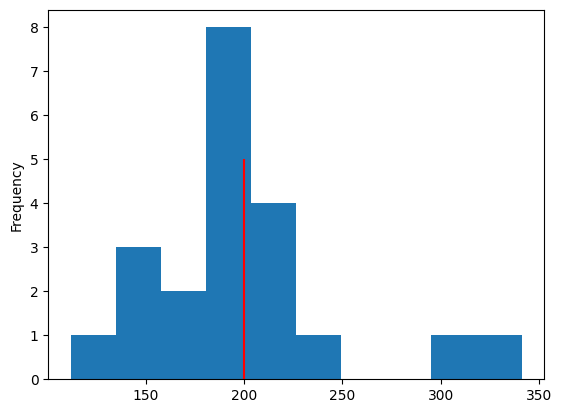

In [14]:
tmp = (specs_df['coralme'] - specs_df['mmodel'])
tmp.plot.hist()
plt.vlines(x=tmp.mean(), ymin = 0, ymax = 5, color='r')
plt.savefig('figures/added_genes_dist.svg',format='SVG')

Gene increase from M-model to dME-model

In [15]:
tmp.sort_values()

M. mycoides           112.0
L. crescens           135.0
T. maritima           149.0
Synechocystis         155.0
N. europaea           162.0
G. metallireducens    177.0
S. aureus             184.0
L. cremoris           187.0
S. elongatus          189.0
A. baumannii          194.0
H. pylori             195.0
M. tuberculosis       199.0
B. subtilis           199.0
P. putida             199.0
S. enterica           215.0
Y. pestis             220.0
S. flexneri           221.0
C. ljungdahlii        223.0
E. coli               244.0
C. difficile          300.0
V. cholerae           341.0
dtype: float64

Gene increase from M-model to dME-model for published ME-models

In [16]:
colors = ['#848484','#80B3DF','#5282AC','#FFAD65']
gene_df = specs_df.drop('genome',axis=1)[['mmodel','coralme','published','curated']]
df = gene_df

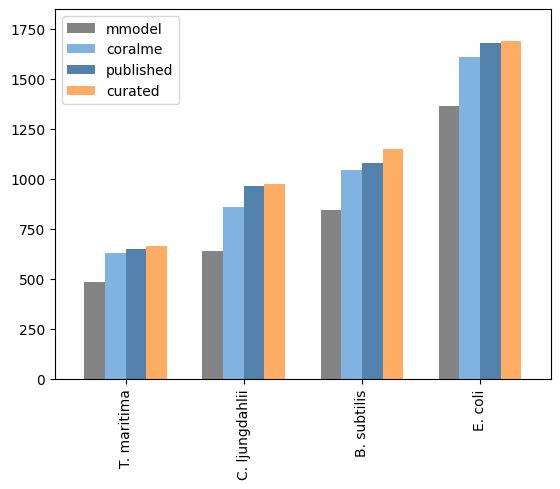

In [17]:
plt.rcParams['svg.fonttype'] = 'none'
df[df['curated']>0].sort_values('curated').plot.bar(
                                   width=0.7,color=colors)
plt.ylim([0,1850])
plt.savefig('./figures/Fig2c.svg',format='SVG')

Gene increase from M-model to dME-model for all other organisms

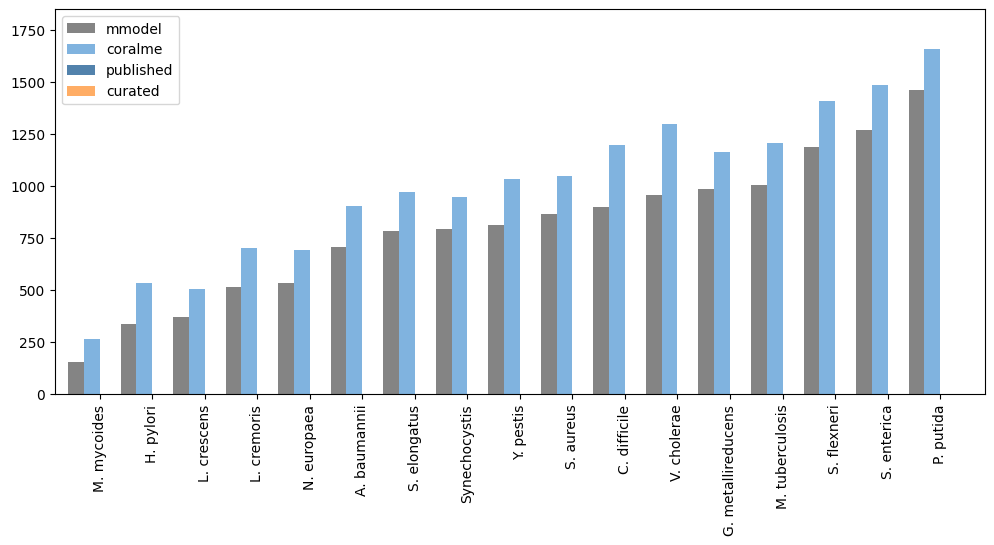

In [18]:
import pandas
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'
df[df['curated']==0].sort_values('mmodel').plot.bar(figsize=(12,5),
                                   width=1.2,
                                   color=colors)
plt.ylim([0,1850])

plt.savefig('./figures/Fig2a.svg',format='SVG')

## Genome coverage

Number of genes in all genomes

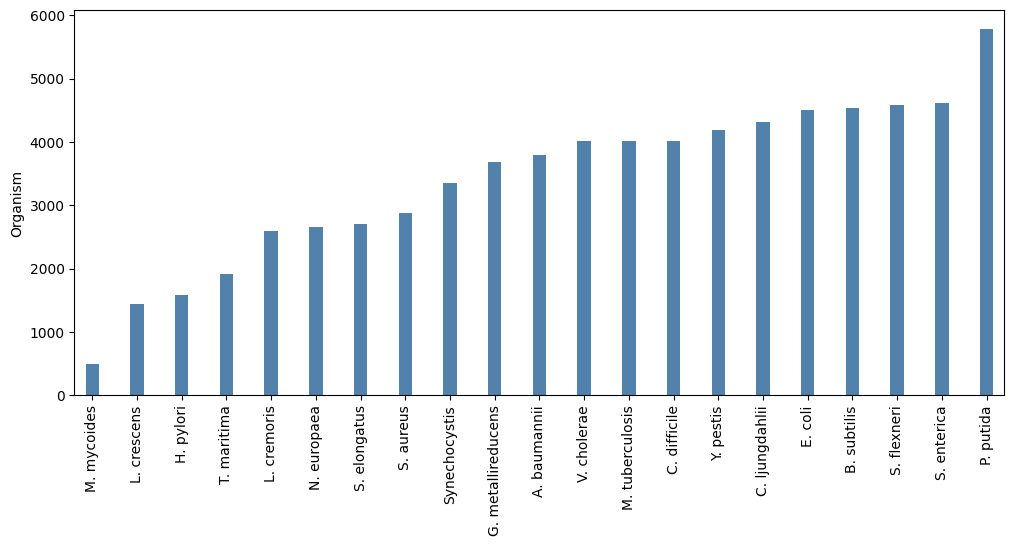

In [19]:
specs_df['genome'].sort_values().plot.bar(color=colors[2], figsize=(12,5),width=0.3)
plt.ylabel('Genome size, # of genes')
plt.ylabel('Organism')
plt.savefig('./figures/genome_sizes.svg',format='SVG')

Coverage of M- and ME-models

In [20]:
colors = ['#848484','#80B3DF','#5282AC','#FFAD65']
cov_df = specs_df.div(specs_df['genome'],axis=0).drop('genome',axis=1)[['mmodel','coralme','published','curated']]
cov_df

,mmodel,coralme,published,curated
M. tuberculosis,0.251497,0.301148,0.000000,0.000000
H. pylori,0.214015,0.337121,0.000000,0.000000
C. difficile,0.224104,0.298805,0.000000,0.000000
N. europaea,0.200752,0.261654,0.000000,0.000000
Y. pestis,0.194279,0.246722,0.000000,0.000000
P. putida,0.252679,0.287072,0.000000,0.000000
L. crescens,0.259930,0.354007,0.000000,0.000000
L. cremoris,0.199459,0.271743,0.000000,0.000000
V. cholerae,0.239581,0.324682,0.000000,0.000000
S. aureus,0.300173,0.363951,0.000000,0.000000


Change in coverage of from M- to dME-models

In [21]:
(cov_df['coralme'] - cov_df['mmodel']).sort_values()

P. putida             0.034393
B. subtilis           0.043871
Synechocystis         0.046172
S. enterica           0.046658
G. metallireducens    0.048033
S. flexneri           0.048274
M. tuberculosis       0.049651
A. baumannii          0.051187
C. ljungdahlii        0.051644
Y. pestis             0.052443
E. coli               0.054258
N. europaea           0.060902
S. aureus             0.063778
S. elongatus          0.069690
L. cremoris           0.072284
C. difficile          0.074701
T. maritima           0.077685
V. cholerae           0.085101
L. crescens           0.094077
H. pylori             0.123106
M. mycoides           0.225806
dtype: float64

Change in coverage of from M- to published ME-models

In [22]:
(cov_df['curated'] - cov_df['published']).sort_values(ascending=False).head(4)

B. subtilis       0.015432
T. maritima       0.007821
E. coli           0.002446
C. ljungdahlii    0.001621
dtype: float64

Coverage increase from M-model to dME-model for published ME-models

In [23]:
df = cov_df

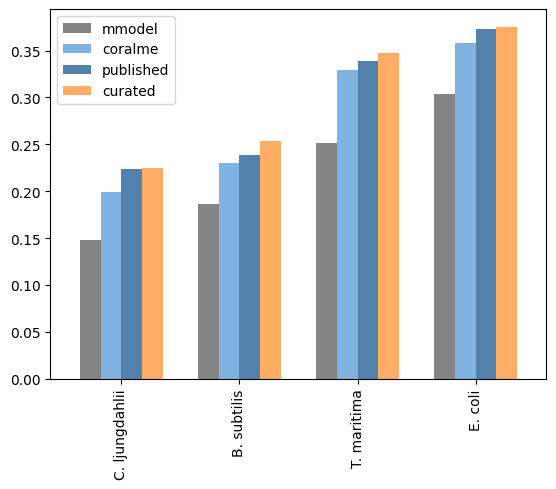

In [24]:
import pandas
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'
df[df['curated']>0].sort_values('curated').plot.bar(
                                   width=0.7,color=colors)
plt.savefig('./figures/Fig2c1.svg',format='SVG')

Coverage increase from M-model to dME-model for all other organisms

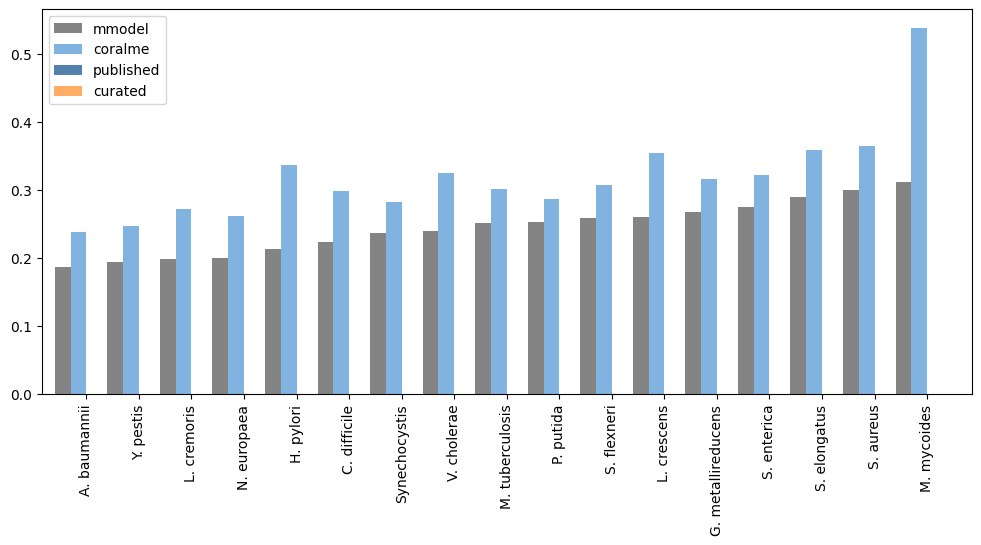

In [25]:
import pandas
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'
df[df['curated']==0].sort_values('mmodel').plot.bar(figsize=(12,5),
                                   width=1.2,
                                   color=colors)
plt.savefig('./figures/Fig2a1.svg',format='SVG')

Visualize the same information as heatmaps

In [26]:
import seaborn as sns

In [27]:
cmap = plt.cm.get_cmap('Reds').copy()
# cmap.set_bad('midnightblue')      # color of mask on heatmap
cmap.set_under('white')

/tmp/ipykernel_263397/2376249781.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Reds').copy()


Re-order organisms to see the increase more clearly

In [28]:
mlist = [names[i] for i in models['curated']]
df2 = df.loc[mlist][['mmodel','coralme','published','curated']]
df1 = df.drop(mlist)[['mmodel','coralme']].dropna()
order1 = [i for i in cov_df["mmodel"].sort_values().index if i in df1.index]
df1 = df1.loc[order1]
order2 = [i for i in cov_df["mmodel"].sort_values().index if i in df2.index]
df2 = df2.loc[order2]

Plot for published ME-models

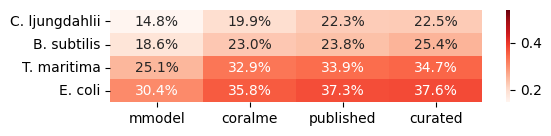

In [29]:
fig,ax = plt.subplots(figsize = (1.5 * df2.shape[1], 0.3 * df2.shape[0]))
sns.heatmap(df2, vmin=df[df>0].min().min(),vmax=df[df>0].max().max(), annot=True,fmt=".1%",cmap=cmap,ax=ax)
plt.savefig('./figures/Fig2d.svg',format='SVG')

Plot for all other ME-models

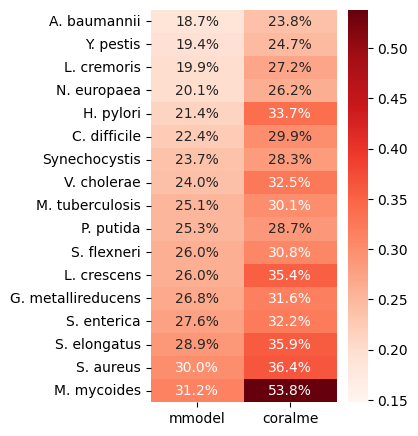

In [30]:
fig,ax = plt.subplots(figsize = (1.5 * df1.shape[1], 0.3 * df1.shape[0]))
sns.heatmap(df1, vmin=df[df>0].min().min(),vmax=df[df>0].max().max(), annot=True,fmt=".1%",cmap=cmap,ax=ax)
plt.savefig('./figures/Fig2b.svg',format='SVG')

## Inspect mapped gene functions in the ME-models

Function to get gene functions

In [31]:
def get_functions(dct):
    from collections import defaultdict
    functions = defaultdict()
    for k,me in dct.items():
        d = defaultdict(int)
        for g in me.all_genes:
            if not g.functions:
                d['none'] += 1
                continue
            for f in g.functions:
                d[f] += 1
        functions[names[k]] = d
    return functions

Get gene functions in the dME-models

In [32]:
fct1 = get_functions(models['clean'])

Get gene functions in the uME-models

In [33]:
fct2 = get_functions(models['curated'])

Summarize the gene functions in dataframes

In [34]:
functions = ['Translation','tRNA-Charging','Post-translation','Transcription']
df1 = pandas.DataFrame.from_dict(fct1).T.fillna(0)[functions + ['none']]
df2 = df1.loc[mlist]
df1["Mapped"] = df1.drop("none",axis=1).sum(axis=1)
df1.drop(mlist,inplace=True)

# df1 = df1.loc[order1]
df1 = df1.sort_values("Mapped")
df2 = df2.loc[order2]

Mapped gene functions to dME-models

In [35]:
df1

,Translation,tRNA-Charging,Post-translation,Transcription,none,Mapped
M. mycoides,110.0,49.0,1.0,15.0,1.0,175.0
L. crescens,125.0,64.0,4.0,21.0,6.0,214.0
Synechocystis,145.0,62.0,3.0,18.0,3.0,228.0
N. europaea,142.0,61.0,7.0,23.0,1.0,233.0
G. metallireducens,153.0,71.0,7.0,26.0,1.0,257.0
S. aureus,173.0,79.0,7.0,21.0,1.0,280.0
L. cremoris,174.0,83.0,3.0,21.0,1.0,281.0
A. baumannii,191.0,92.0,4.0,27.0,4.0,314.0
M. tuberculosis,186.0,104.0,3.0,24.0,2.0,317.0
Y. pestis,194.0,91.0,7.0,27.0,5.0,319.0


Distribution of mapped gene functions by category

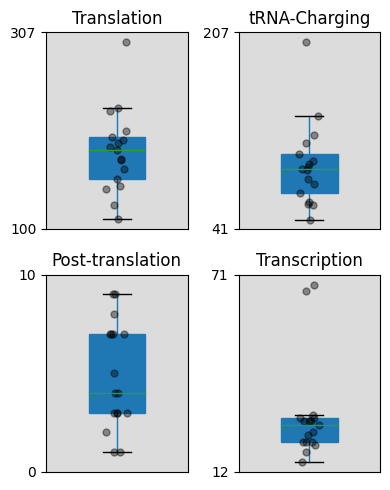

In [36]:
fig,ax = plt.subplots(2,2,figsize=(4,5))
ax=ax.flatten()
for idx,c in enumerate(df1.columns[:-2]):
    bp = df1[[c]].boxplot(vert=True,ax=ax[idx],grid=False,widths = [0.4],showfliers=False,
                          patch_artist = True, return_type='both')
    Y = np.random.normal(1., 0.04,size = df1[[c]].shape[0])
    for i,y in zip(df1[[c]].values,Y):
        ax[idx].plot(y,i,'o',color='k',alpha=0.4,markersize=5)
    
#     for row_key, (ax,row) in bp_dict.iteritems():
#         for i,box in enumerate(row['boxes']):
#             box.set_facecolor('white')
    ax[idx].set_facecolor("gainsboro")
    
    
    start, end = [int(i) for i in ax[idx].get_ylim()]
    ax[idx].set_ylim([max(0,start),end])
    ax[idx].set_title(c)
    ax[idx].yaxis.set_ticks([max(0,start),end+1])
    ax[idx].xaxis.set_ticks([])
plt.tight_layout()
plt.savefig('./figures/Fig2g.svg',format='SVG')

Average mapped gene functions in dME-models

In [63]:
df1.mean()

Translation         181.588235
tRNA-Charging        94.823529
Post-translation      4.882353
Transcription        28.764706
none                  6.705882
Mapped              310.058824
dtype: float64

Mapped gene functions in the dME-models of published ME-models

In [38]:
df2

,Translation,tRNA-Charging,Post-translation,Transcription,none
C. ljungdahlii,195.0,95.0,3.0,20.0,1.0
B. subtilis,157.0,107.0,2.0,23.0,1.0
T. maritima,138.0,67.0,3.0,20.0,1.0
E. coli,211.0,90.0,24.0,29.0,3.0


Final mapped gene functions in uME-models

In [39]:
df3 = pandas.DataFrame.from_dict(fct2).T.fillna(0)[functions]
df3 = df3.rename({k:k + '_curated' for k in df3.index})
df3

,Translation,tRNA-Charging,Post-translation,Transcription
T. maritima_curated,141.0,90.0,3.0,18.0
E. coli_curated,223.0,154.0,29.0,37.0
C. ljungdahlii_curated,212.0,129.0,10.0,21.0
B. subtilis_curated,210.0,136.0,13.0,44.0


Merge the gene functions of dME-models and published ME-models

In [40]:
order3 = [order2[i//2] for i in range(0,len(order2)*2)]
order3 = [i if not idx%2 else i + '_curated' for idx,i in enumerate(order3)]
df4 = pandas.concat([df2,df3]).fillna(0.).loc[order3]
df4.sum(axis=1)

C. ljungdahlii            314.0
C. ljungdahlii_curated    372.0
B. subtilis               290.0
B. subtilis_curated       403.0
T. maritima               229.0
T. maritima_curated       252.0
E. coli                   357.0
E. coli_curated           443.0
dtype: float64

Fraction of gene functions already mapped in the dME-models (compared to final uME-models)

In [41]:
gfp1 = df4[df4.index.str.contains("curated")].drop("none",axis=1).sum(axis=1)
gfp2 = df4[~df4.index.str.contains("curated")].drop("none",axis=1).sum(axis=1)
pandas.DataFrame(gfp2.values/gfp1.values,index=gfp2.index,columns=["fraction"]).sort_values("fraction")

,fraction
B. subtilis,0.717122
E. coli,0.799097
C. ljungdahlii,0.841398
T. maritima,0.904762


Heatmap of mapped gene functions in the dME-models by category

/tmp/ipykernel_263397/3378120587.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('YlGnBu').copy()


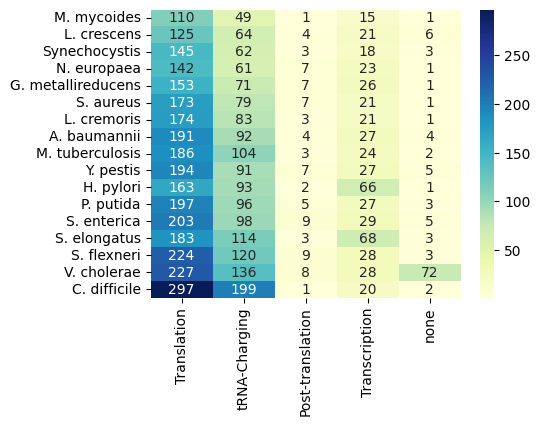

In [42]:
cmap = plt.cm.get_cmap('YlGnBu').copy()
# cmap.set_bad('midnightblue') # color of mask on heatmap
cmap.set_under('white')

tmp = df1[functions + ["none"]]
fig,ax = plt.subplots(figsize = (1.0 * tmp.shape[1], 0.22 * tmp.shape[0]))
hm = sns.heatmap(tmp,vmin=tmp.min().min(),vmax=tmp.max().max(), annot=True,fmt="g",cmap=cmap,ax=ax)
plt.savefig('./figures/Fig2e.svg',format='SVG')

Heatmap of total mapped gene functions in the dME-models

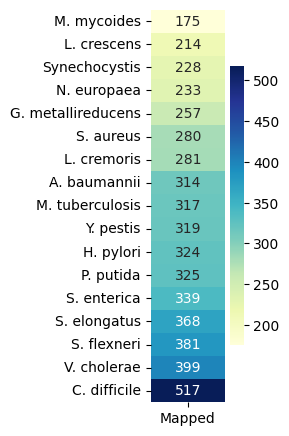

In [43]:
tmp = df1[["Mapped"]]
fig,ax = plt.subplots(figsize = (1.2, 0.3 * tmp.shape[0]))
hm = sns.heatmap(tmp, annot=True,fmt="g",cmap=cmap,ax=ax)
plt.savefig('./figures/Fig2e2.svg',format='SVG')

Heatmap comparing mapped gene functions in the dME-models and uME-models

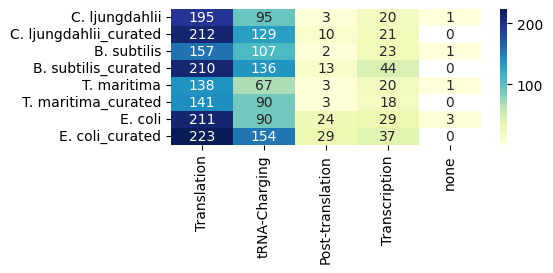

In [44]:
fig,ax = plt.subplots(figsize = (1.0 * df4.shape[1], 0.22 * df4.shape[0]))
hm = sns.heatmap(df4, annot=True,fmt="g",cmap=cmap,vmin=1,vmax=df4.max().max(),ax=ax)
plt.savefig('./figures/Fig2f.svg',format='SVG')

## Computation times

In [45]:
from datetime import datetime
import re

Function to calculate times from log files in each organism's directory.

Run <code> bash get_times.sh </code> in clean/ to get the files necessary for this part.


In [46]:
def get_times(filename):
    times = {}
    for l in open(filename,"r").readlines():
        if l == '\n':continue
        org = re.findall("(?<=\=\=\> \./)[a-z]*",l)
        if org:
            current_org = org[0]
            continue
        tstring = l.split(",")[0]
        dt = datetime.strptime(tstring,"%Y-%m-%d %H:%M:%S")
        times[current_org] = dt
    return times

Get computation times

In [47]:
b1 = get_times("./clean/builder_time1.txt")
b2 = get_times("./clean/builder_time2.txt")
r1 = get_times("./clean/recon_time1.txt")
r2 = get_times("./clean/recon_time2.txt")
t1 = get_times("./clean/ts_time1.txt")
t2 = get_times("./clean/ts_time2.txt")

Get computation times

In [48]:
times = {}
for org in b1.keys():
    # if org in exclude: continue
    times[org] = {
        "sync" : (b2[org] - b1[org]).total_seconds()/60.0,
        "recon" : (r2[org] - r1[org]).total_seconds()/60.0,
        "troub" : (t2[org] - t1[org]).total_seconds()/60.0
    }
df = pandas.DataFrame.from_dict(times).T.rename(names)

Computation times for dME-model reconstruction

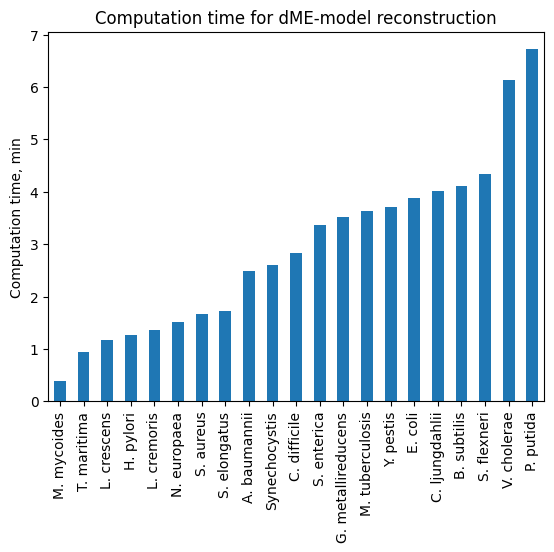

In [49]:
df[['sync','recon']].T.sum().sort_values().plot.bar()
plt.title("Computation time for dME-model reconstruction")
plt.ylabel("Computation time, min")
plt.savefig("./figures/build_timespans.svg",format="SVG")

Average time for dME-model reconstruction in minutes

In [50]:
df[['sync','recon']].sum(1).mean()

2.922222222222222

Computation times for dME-model troubleshooting

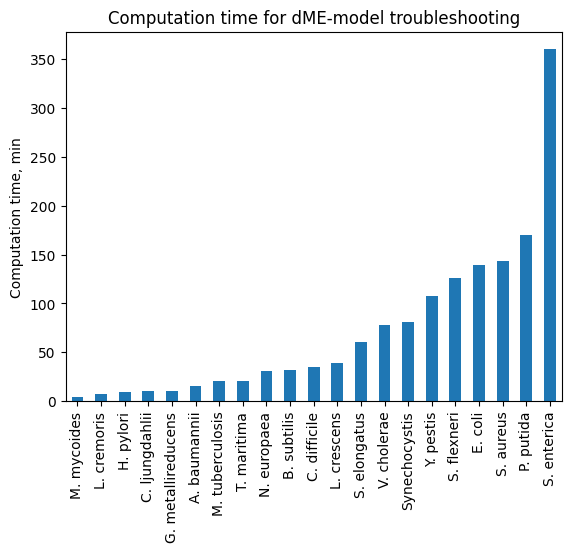

In [51]:
(df[["troub"]].T.sum()).sort_values().plot.bar()
plt.title("Computation time for dME-model troubleshooting")
plt.ylabel("Computation time, min")
plt.savefig("./figures/troubleshoot_timespans.svg",format="SVG")

Average time for dME-model troubleshooting in minutes

In [52]:
df[['troub']].sum(1).mean()

71.65952380952383

## Notes

#### Clostridium had a lot of manual curation on M-reactions

In [53]:
df2=specs_df[specs_df['published']>0]
(df2['published'] - df2['coralme']).div(df2['published'] - df2['mmodel'])

T. maritima       0.118343
C. ljungdahlii    0.320122
B. subtilis       0.160338
E. coli           0.215434
dtype: float64

In [54]:
df2=specs_df[specs_df['published']>0]
1 - (df2['published'] - df2['coralme']).div(df2['published'] - df2['mmodel'])

T. maritima       0.881657
C. ljungdahlii    0.679878
B. subtilis       0.839662
E. coli           0.784566
dtype: float64

In [55]:
me1 = models['curated']['cljungdahlii']

In [56]:
me2 = models['clean']['cljungdahlii']

In [57]:
len(me1.all_genes)

972

In [58]:
len(me2.all_genes)

860

In [59]:
len(me1.gem.genes)

638

In [60]:
from collections import defaultdict
d = defaultdict(int)
for i in set(i.id for i in me1.all_genes) - set(i.id for i in me2.all_genes):
    g = me1.get(i)
#     print(g.id,g.functions)    
    if any('Metabolic' in j for j in g.functions):
        d['Metabolic'] += 1
    else:
        d['E'] += 1
d

defaultdict(int, {'Metabolic': 66, 'E': 56})